In [317]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [318]:
df=pd.read_csv("./Logistic_X_Train.csv")

In [319]:
x=df.values

In [320]:
y=pd.read_csv("./Logistic_Y_Train.csv")

In [321]:
y=y.values

In [322]:
type(y)
print(y)
print(y.shape)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]
(3000, 1)


In [323]:
type(x)

numpy.ndarray

In [324]:
print(x)

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 ...
 [ 0.08827657  1.63878904 -2.19364056]
 [ 1.52515501  0.85923429  1.50530791]
 [-0.97981744  0.56395376 -1.53939416]]


In [325]:
np.sum(y)

1491

In [326]:
# noramalisation
mean=x.mean(axis=0)
std=x.std(axis=0)
x=(x-mean)/std
print(mean,std)

[0.00745338 0.99928635 0.02948714] [1.33391527 1.02368243 1.20935638]


C:\Users\PANKAJ\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


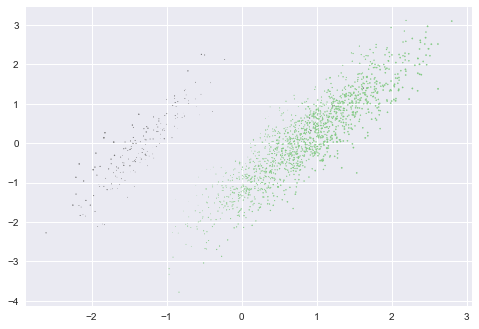

In [327]:
plt.style.use("seaborn")
plt.scatter(x[:,0],x[:,1],x[:,2],c=y.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()

In [328]:
# logistic implementation

In [329]:
def hypothesis(x,theta):
    return(sigmoid(np.dot(x,theta)))

In [330]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [331]:
def error(x,y,theta):
    hi=hypothesis(x,theta)
    loss=np.sum(y*np.log(hi)+(1-y)*np.log(1-hi))
    m=x.shape[0]
    return (-1*loss)

In [332]:
def gradient(x,y,theta):
    hi=hypothesis(x,theta)
    m=x.shape[0]
    grad=-np.dot(x.T,(y-hi))
    return (grad/m)

In [333]:
def gradient_descent(x,y,lr=0.1,max_step=1000):
    theta=np.zeros((x.shape[1],1))
    error_list=[]
    for i in range(max_step):
        curr_error=error(x,y,theta)
        error_list.append(curr_error)
        grad=gradient(x,y,theta)
        theta=theta-lr*grad
    return theta,error_list

In [334]:
one=np.ones((x.shape[0],1))


In [335]:
x_update=np.hstack((one,x))



In [336]:
x_update.shape

(3000, 4)

In [337]:
theta,error_list=gradient_descent(x_update,y)
print(theta)

[[-0.5300282 ]
 [-3.16823469]
 [ 1.84554244]
 [-2.59861463]]


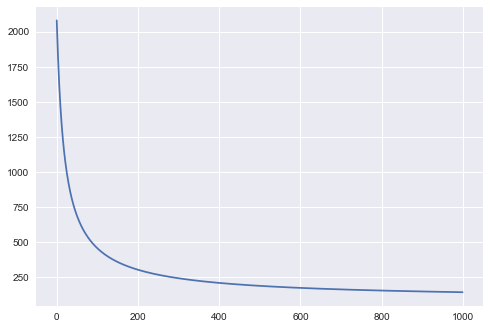

In [338]:
plt.plot(error_list)

In [339]:
h=hypothesis(x_update,theta)

In [340]:
y_train_pred=np.zeros((h.shape[0],1))
y_train_pred[h>=0.5]=1


In [341]:
#accuracy
train_accuracy = np.sum(y_train_pred==y)/y.shape[0]
print(train_accuracy)

0.9936666666666667


In [342]:
x_test=pd.read_csv("./Logistic_X_test.csv")
x_test=x_test.values
test_ones=np.ones((x_test.shape[0],1))
x_test_update=np.hstack((test_ones,x_test))

In [343]:
y_pred=hypothesis(x_test_update,theta)

In [344]:
y_test=np.zeros((y_pred.shape[0],1))

In [345]:
y_test[y_pred>=0.5]=1


In [346]:
df=pd.DataFrame(data=y_test,columns=["label"])
df.to_csv("separate_pred.csv",index=False)